In [2]:
from numpy.lib.type_check import nan_to_num
%load_ext autoreload
%autoreload 2

In [3]:
from src.scripts.age_CMU import *
import pandas as pd
import matplotlib.pyplot as plt

### Load the data

In [4]:
# We begin by loading the data
DATAPATH = "data/"
movies_df = load_tsv(DATAPATH + "movie.metadata.tsv")
characters_df = load_tsv(DATAPATH + "character.metadata.tsv")

### Filter and name

We see that the Dataframes have a lot of columns which are not always useful. In addition, they do not have a name. So let's begin by giving a name to those columns and filtering those we do not need.

In [5]:
# We name the columns and pick which ones we want
movies_df, characters_df = name_and_filter_columns(movies_df, characters_df)

It is really important to track the NaN values in the dataset, so let's print the info we have on each column.

Total entries: 81741

Freebase movie ID        0
Movie name               0
Movie release date    6902
Movie countries          0
Movie genres             0
dtype: int64


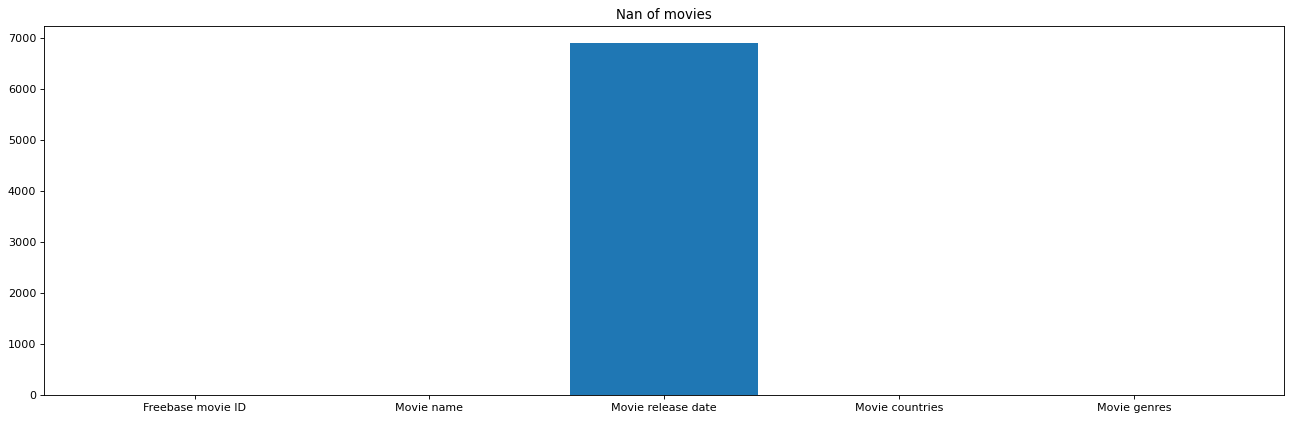

________________________
Total entries: 450669

Freebase movie ID                  0
Character name                257875
Actor date of birth           106145
Actor gender                   45609
Actor name                      1228
Actor age at movie release    158113
Freebase actor ID                815
dtype: int64


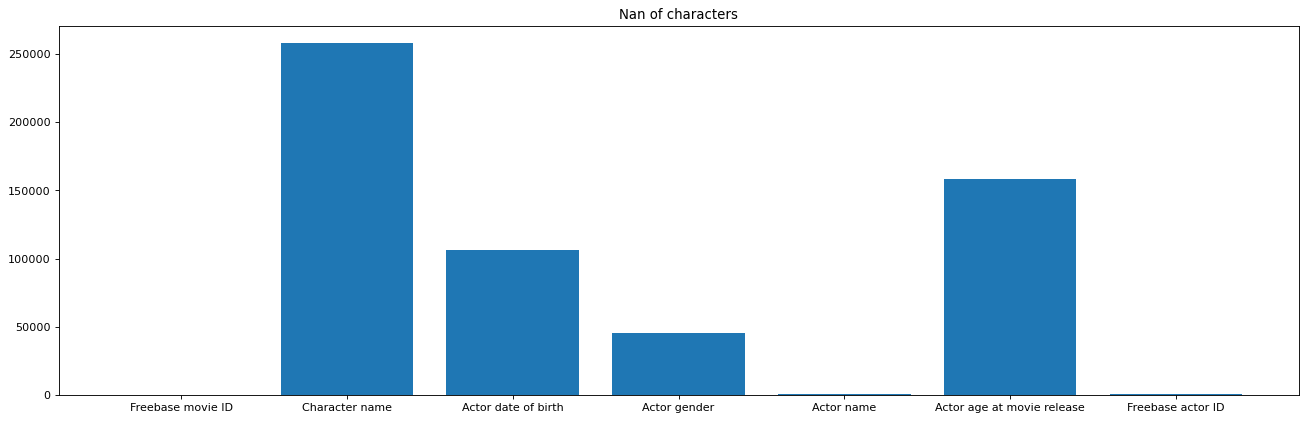

In [6]:
# We print some info about NaNs
plot_nan_values(movies_df, "Nan of movies")
plt.show()
print("________________________")
plot_nan_values(characters_df, "Nan of characters")
plt.show()

Let's see also how is the data.

In [15]:
movies_df.head()

,Freebase movie ID,Movie name,Movie release date,Movie countries,Movie genres
0,/m/03vyhn,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,/m/0crgdbh,Brun bitter,1988,[Norway],"[Crime Fiction, Drama]"
3,/m/0285_cd,White Of The Eye,1987,[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,/m/01mrr1,A Woman in Flames,1983,[Germany],[Drama]


In [16]:
characters_df.head()

,Freebase movie ID,Character name,Actor date of birth,Actor gender,Actor name,Actor age at movie release,Freebase actor ID
0,/m/03vyhn,Akooshay,1958,F,Wanda De Jesus,42,/m/03wcfv7
1,/m/03vyhn,Lieutenant Melanie Ballard,1974,F,Natasha Henstridge,27,/m/0346l4
2,/m/03vyhn,Desolation Williams,1969,M,Ice Cube,32,/m/01vw26l
3,/m/03vyhn,Sgt Jericho Butler,1967,M,Jason Statham,33,/m/034hyc
4,/m/03vyhn,Bashira Kincaid,1977,F,Clea DuVall,23,/m/01y9xg


### Reformat and type fixing

We see that the 'Movie countries' and 'Movie genres' have a strange format. It includes a Freebase id and its real value. Let's fix this by converting the string dict to a list of the real values.

In [17]:
#We transform the movie genres and countries from a string dict to a list
movies_df = refactor_movie_genres_countries(movies_df)
movies_df.head()

ValueError: malformed node or string: ['Thriller', 'Science Fiction', 'Horror', 'Adventure', 'Supernatural', 'Action', 'Space western']

We also see that the dates do not all have the same format and have absurd values (like year 1000). Let's change this by taking only the year of the date,casting it to `int` and change all absurd values by NaN. (N.B. this may be tricky since these columns contains NaN values). 

In [8]:
# We refactor the release date (take only the year and cast to int)
movies_df = refactor_movie_release_date(movies_df)
movies_df.head()

,Freebase movie ID,Movie name,Movie release date,Movie countries,Movie genres
0,/m/03vyhn,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,[United States of America],"[Mystery, Biographical film, Drama, Crime Drama]"
2,/m/0crgdbh,Brun bitter,1988,[Norway],"[Crime Fiction, Drama]"
3,/m/0285_cd,White Of The Eye,1987,[United Kingdom],"[Thriller, Erotic thriller, Psychological thri..."
4,/m/01mrr1,A Woman in Flames,1983,[Germany],[Drama]


In [9]:
# We do the same with the date of birth
characters_df = refactor_actor_dob(characters_df)
characters_df.head()

,Freebase movie ID,Character name,Actor date of birth,Actor gender,Actor name,Actor age at movie release,Freebase actor ID
0,/m/03vyhn,Akooshay,1958,F,Wanda De Jesus,42.0,/m/03wcfv7
1,/m/03vyhn,Lieutenant Melanie Ballard,1974,F,Natasha Henstridge,27.0,/m/0346l4
2,/m/03vyhn,Desolation Williams,1969,M,Ice Cube,32.0,/m/01vw26l
3,/m/03vyhn,Sgt Jericho Butler,1967,M,Jason Statham,33.0,/m/034hyc
4,/m/03vyhn,Bashira Kincaid,1977,F,Clea DuVall,23.0,/m/01y9xg


Then, we see that the 'Actor age at movie release' column is in float, while it logically must contain only integer values. We can just cast it.

In [134]:
print(type(characters_df['Actor age at movie release'][7]))

<class 'numpy.float64'>


In [10]:
# We cast actor age to int
characters_df['Actor age at movie release'] = characters_df['Actor age at movie release'].astype('Int64')
characters_df.head()

,Freebase movie ID,Character name,Actor date of birth,Actor gender,Actor name,Actor age at movie release,Freebase actor ID
0,/m/03vyhn,Akooshay,1958,F,Wanda De Jesus,42,/m/03wcfv7
1,/m/03vyhn,Lieutenant Melanie Ballard,1974,F,Natasha Henstridge,27,/m/0346l4
2,/m/03vyhn,Desolation Williams,1969,M,Ice Cube,32,/m/01vw26l
3,/m/03vyhn,Sgt Jericho Butler,1967,M,Jason Statham,33,/m/034hyc
4,/m/03vyhn,Bashira Kincaid,1977,F,Clea DuVall,23,/m/01y9xg


### Joining the Dataframes
Now that we have corrected the values, we can join the two Dataframes in order to have all information on one big Dataframe.

In [11]:
# We join the two dataframes
joined_df = characters_df.join(movies_df.set_index('Freebase movie ID'), on='Freebase movie ID', how='left')

In [12]:
joined_df.head()

,Freebase movie ID,Character name,Actor date of birth,Actor gender,Actor name,Actor age at movie release,Freebase actor ID,Movie name,Movie release date,Movie countries,Movie genres
0,/m/03vyhn,Akooshay,1958,F,Wanda De Jesus,42,/m/03wcfv7,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
1,/m/03vyhn,Lieutenant Melanie Ballard,1974,F,Natasha Henstridge,27,/m/0346l4,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
2,/m/03vyhn,Desolation Williams,1969,M,Ice Cube,32,/m/01vw26l,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
3,/m/03vyhn,Sgt Jericho Butler,1967,M,Jason Statham,33,/m/034hyc,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."
4,/m/03vyhn,Bashira Kincaid,1977,F,Clea DuVall,23,/m/01y9xg,Ghosts of Mars,2001,[United States of America],"[Thriller, Science Fiction, Horror, Adventure,..."


Total entries: 450669

Freebase movie ID                  0
Character name                257875
Actor date of birth           106170
Actor gender                   45609
Actor name                      1228
Actor age at movie release    158113
Freebase actor ID                815
Movie name                         0
Movie release date             10010
Movie countries                    0
Movie genres                       0
dtype: int64


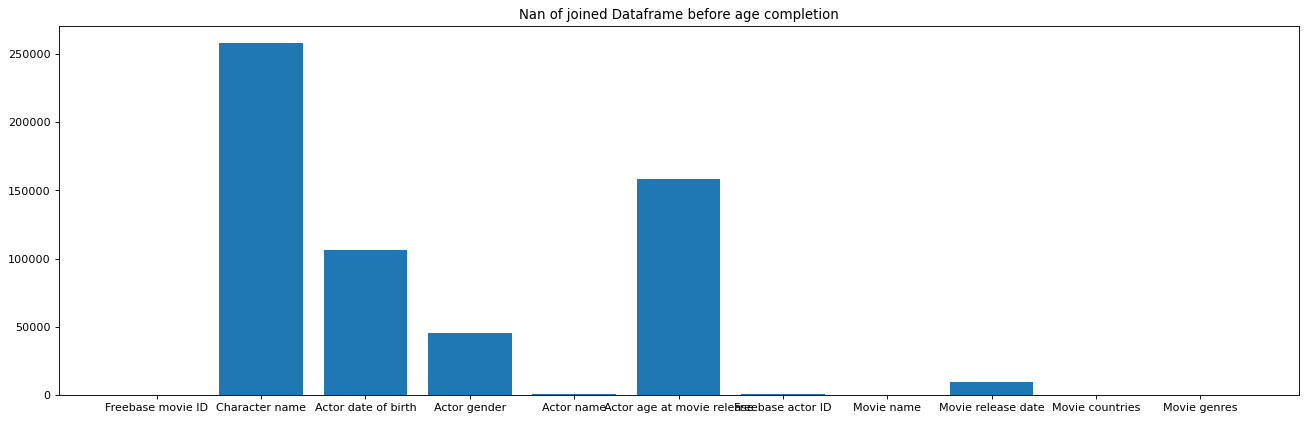

In [13]:
plot_nan_values(joined_df, "Nan of joined Dataframe before age completion")
plt.show()

### Age completion

A lot of ages at movie release are still missing. Since we know the date of birth and the movie release date, we can easily deduce the actor age at movie release. Let's do that.
As we do not need the date of birth and the movie release date, we can just remove them, as well as the row where the age is still missing, since it is an important value for our project.

Total entries: 335396

Freebase movie ID                  0
Character name                186977
Actor gender                    2069
Actor name                        13
Actor age at movie release         0
Freebase actor ID                  0
Movie name                         0
Movie countries                    0
Movie genres                       0
dtype: int64


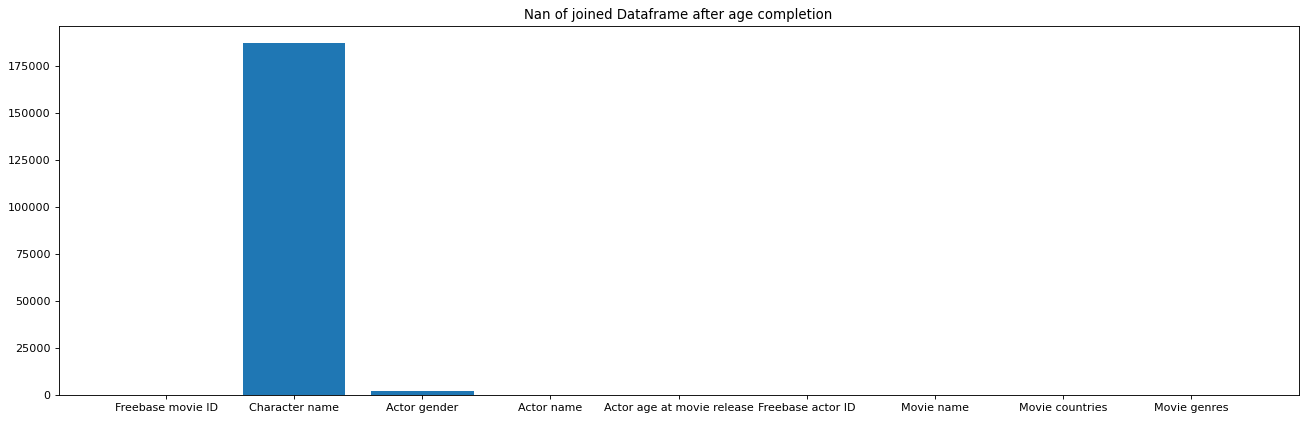

In [14]:
joined_df = complete_age(joined_df)
plot_nan_values(joined_df, "Nan of joined Dataframe after age completion")

In [160]:
joined_df.groupby('Freebase actor ID').size().sort_values()

Freebase actor ID
/m/0zjpz        1
/m/0j8q2k2      1
/m/0j8q2mq      1
/m/07c46v       1
/m/07c131       1
             ... 
/m/02n1gr     211
/m/02fbpz     223
/m/04c636     298
/m/0lh0c      298
/m/0c5vh      648
Length: 58280, dtype: int64

In [163]:
print(joined_df[joined_df['Freebase actor ID'] == '/m/04c636'])

       Freebase movie ID Character name Actor gender          Actor name  \
805           /m/0g59khw            NaN            M  Mithun Chakraborty   
1262          /m/0ds8gfb            NaN            M  Mithun Chakraborty   
3275          /m/0gx1gwf            NaN            M  Mithun Chakraborty   
6796          /m/0g9y0x3            NaN            M  Mithun Chakraborty   
6918          /m/0gx01jt            NaN            M  Mithun Chakraborty   
...                  ...            ...          ...                 ...   
445800        /m/0h956pq            NaN            M  Mithun Chakraborty   
446046        /m/0j_64v4            NaN            M  Mithun Chakraborty   
446939        /m/0j9qb3x            NaN            M  Mithun Chakraborty   
446975        /m/0crtmk9            NaN            M  Mithun Chakraborty   
448345        /m/0fq38wk            NaN            M  Mithun Chakraborty   

        Actor age at movie release Freebase actor ID     Movie name  \
805             

(N.B. If we still need more data, we can complete the age of the actors by looking on another database like Wikidata)